In [1]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import re
from datetime import datetime
import numpy as np
from math import ceil
import calmap
import calplot

In [2]:
df = pd.read_csv("youtube_data.csv", index_col=False)
df = df.drop('Unnamed: 0', axis=1)
df

,channel_name,title,published,description,length,tag,view_count,like_count,comment_count,collaboration,duration_in_minutes,day_published,year,month,day
0,Joshua Weissman,Perfect Steak Au Poivre,2023-11-15 17:16:05,Check out Google’s Holiday 100 list for trendi...,PT30S,No tags,165706,10342,93,False,0.500000,wednesday,2023,11,15
1,Joshua Weissman,Every Way to Cook Steak (34 Ways),2023-11-12 15:30:10,The steak recipe to end all recipes. Special t...,PT29M18S,Have tags,1062094,40946,2220,False,29.300000,sunday,2023,11,12
2,Joshua Weissman,I Made The Easiest Ramen Ever,2023-11-08 16:00:23,Easiest Ramen (that's not instant ramen) 3 dif...,PT10M56S,Have tags,1341324,56279,1283,False,10.933333,wednesday,2023,11,8
3,Joshua Weissman,MCRIB At Home With Terry Crews,2023-11-04 19:30:00,NaN,PT31S,No tags,875029,73229,727,False,0.516667,saturday,2023,11,4
4,Joshua Weissman,I Tried Every Fast Food Fried Chicken Sandwich...,2023-11-01 14:30:16,Get MY NEW Cookbook: https://bit.ly/TextureOve...,PT23M1S,Have tags,2678009,85991,6291,False,23.016667,wednesday,2023,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,Nick DiGiovanni,How To Cook Arctic Char,2020-10-13 01:56:10,"The perfect combination of salmon and trout, s...",PT4M55S,Have tags,430600,13068,379,False,4.916667,tuesday,2020,10,13
1790,Nick DiGiovanni,How To Cook Salmon,2020-09-29 00:12:38,This is salmon made easy. Follow my 80-20 rule...,PT2M31S,Have tags,444451,14634,282,False,2.516667,tuesday,2020,9,29
1791,Nick DiGiovanni,Beef Wellington,2020-09-14 18:41:27,Beef Wellington doesn't have to be scary. \n\n...,PT8M5S,Have tags,830370,27474,1116,False,8.083333,monday,2020,9,14
1792,Nick DiGiovanni,Japanese A5 Wagyu Beef,2020-08-31 21:42:22,You can almost eat this steak with a spoon. \n...,PT10M29S,Have tags,795780,20420,592,False,10.483333,monday,2020,8,31


In [3]:
df.describe()

,view_count,like_count,comment_count,duration_in_minutes,year,month,day
count,1.794000e+03,1.794000e+03,1.794000e+03,1794.000000,1794.000000,1794.000000,1794.000000
mean,5.014168e+06,2.381531e+05,5.646257e+03,6.868608,2021.105909,6.473244,15.447603
std,1.107959e+07,6.285146e+05,1.123604e+05,5.980009,1.558647,3.475772,8.742827
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2014.000000,1.000000,1.000000
25%,1.247694e+06,4.351725e+04,1.179250e+03,0.566667,2020.000000,3.000000,8.000000
50%,2.526048e+06,9.143500e+04,2.075000e+03,7.541667,2021.000000,6.000000,15.000000
75%,4.864274e+06,2.251620e+05,3.637000e+03,10.716667,2022.000000,10.000000,23.000000
max,2.384862e+08,1.940288e+07,4.759365e+06,59.983333,2023.000000,12.000000,31.000000


In [4]:
#Feature Engineering

In [5]:
df['year'].value_counts()

2021    498
2022    494
2023    330
2020    187
2019    141
2018    109
2017     15
2016     13
2015      6
2014      1
Name: year, dtype: int64

In [6]:
# Engagement Metric
# Comment + likes / views
df['engagement'] = (df['comment_count'] + df['like_count']) / df['view_count']
df['collaboration'] = np.where(df['collaboration'] == True, 1, 0)
df

,channel_name,title,published,description,length,tag,view_count,like_count,comment_count,collaboration,duration_in_minutes,day_published,year,month,day,engagement
0,Joshua Weissman,Perfect Steak Au Poivre,2023-11-15 17:16:05,Check out Google’s Holiday 100 list for trendi...,PT30S,No tags,165706,10342,93,0,0.500000,wednesday,2023,11,15,0.062973
1,Joshua Weissman,Every Way to Cook Steak (34 Ways),2023-11-12 15:30:10,The steak recipe to end all recipes. Special t...,PT29M18S,Have tags,1062094,40946,2220,0,29.300000,sunday,2023,11,12,0.040642
2,Joshua Weissman,I Made The Easiest Ramen Ever,2023-11-08 16:00:23,Easiest Ramen (that's not instant ramen) 3 dif...,PT10M56S,Have tags,1341324,56279,1283,0,10.933333,wednesday,2023,11,8,0.042914
3,Joshua Weissman,MCRIB At Home With Terry Crews,2023-11-04 19:30:00,NaN,PT31S,No tags,875029,73229,727,0,0.516667,saturday,2023,11,4,0.084518
4,Joshua Weissman,I Tried Every Fast Food Fried Chicken Sandwich...,2023-11-01 14:30:16,Get MY NEW Cookbook: https://bit.ly/TextureOve...,PT23M1S,Have tags,2678009,85991,6291,0,23.016667,wednesday,2023,11,1,0.034459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,Nick DiGiovanni,How To Cook Arctic Char,2020-10-13 01:56:10,"The perfect combination of salmon and trout, s...",PT4M55S,Have tags,430600,13068,379,0,4.916667,tuesday,2020,10,13,0.031229
1790,Nick DiGiovanni,How To Cook Salmon,2020-09-29 00:12:38,This is salmon made easy. Follow my 80-20 rule...,PT2M31S,Have tags,444451,14634,282,0,2.516667,tuesday,2020,9,29,0.033561
1791,Nick DiGiovanni,Beef Wellington,2020-09-14 18:41:27,Beef Wellington doesn't have to be scary. \n\n...,PT8M5S,Have tags,830370,27474,1116,0,8.083333,monday,2020,9,14,0.034430
1792,Nick DiGiovanni,Japanese A5 Wagyu Beef,2020-08-31 21:42:22,You can almost eat this steak with a spoon. \n...,PT10M29S,Have tags,795780,20420,592,0,10.483333,monday,2020,8,31,0.026404


In [7]:
# We learned that we should just remove the first 4 years
#df['year'] = df['year'].str.strip()
df_year_cleaned = df[df['year'] >= 2018]
df_year_cleaned['year'].value_counts()

2021    498
2022    494
2023    330
2020    187
2019    141
2018    109
Name: year, dtype: int64

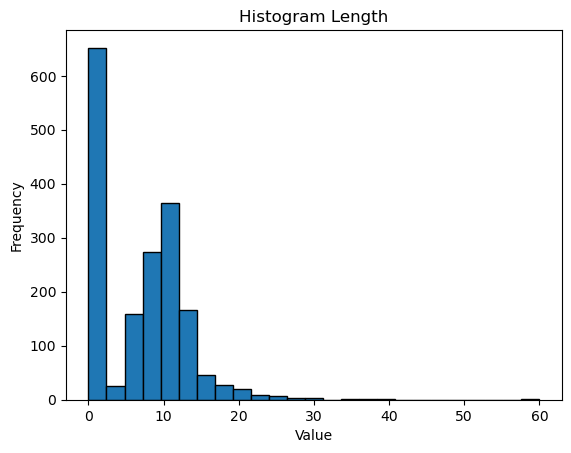

In [8]:
#Lenght of Videos
plt.hist(df_year_cleaned['duration_in_minutes'], bins=25, edgecolor='black')
plt.title('Histogram Length')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
# We can learn from this distribution that "shorts" are included here
# We need to separate "shorts" from actual "youtube videos"
# According to YouTube the max length of a "short" is 1 minute
df_year_cleaned['short'] = np.where(df_year_cleaned['duration_in_minutes'] <= 1, 1, 0)

df_short_clean = df_year_cleaned[df_year_cleaned['short']== 1]
df_videos_clean = df_year_cleaned[df_year_cleaned['short']== 0]
df_videos_clean

/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/2811044368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cleaned['short'] = np.where(df_year_cleaned['duration_in_minutes'] <= 1, 1, 0)


,channel_name,title,published,description,length,tag,view_count,like_count,comment_count,collaboration,duration_in_minutes,day_published,year,month,day,engagement,short
1,Joshua Weissman,Every Way to Cook Steak (34 Ways),2023-11-12 15:30:10,The steak recipe to end all recipes. Special t...,PT29M18S,Have tags,1062094,40946,2220,0,29.300000,sunday,2023,11,12,0.040642,0
2,Joshua Weissman,I Made The Easiest Ramen Ever,2023-11-08 16:00:23,Easiest Ramen (that's not instant ramen) 3 dif...,PT10M56S,Have tags,1341324,56279,1283,0,10.933333,wednesday,2023,11,8,0.042914,0
4,Joshua Weissman,I Tried Every Fast Food Fried Chicken Sandwich...,2023-11-01 14:30:16,Get MY NEW Cookbook: https://bit.ly/TextureOve...,PT23M1S,Have tags,2678009,85991,6291,0,23.016667,wednesday,2023,11,1,0.034459,0
6,Joshua Weissman,I Tried Food From Every State In America,2023-10-17 14:30:12,Get the NEW COOKBOOK: https://bit.ly/TextureOv...,PT33M53S,Have tags,4623827,139547,26353,0,33.883333,tuesday,2023,10,17,0.035879,0
8,Joshua Weissman,Meals So Easy A College Student Could Make It,2023-10-13 14:30:09,"Cheap and easy meals that everyone can make, w...",PT21M56S,Have tags,2518224,103266,2218,0,21.933333,friday,2023,10,13,0.041888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,Nick DiGiovanni,I Cooked A Deep-Sea Fish,2020-11-02 23:40:52,And it definitely tastes better than it looks!...,PT3M24S,Have tags,2706243,79461,2581,0,3.400000,monday,2020,11,2,0.030316,0
1789,Nick DiGiovanni,How To Cook Arctic Char,2020-10-13 01:56:10,"The perfect combination of salmon and trout, s...",PT4M55S,Have tags,430600,13068,379,0,4.916667,tuesday,2020,10,13,0.031229,0
1790,Nick DiGiovanni,How To Cook Salmon,2020-09-29 00:12:38,This is salmon made easy. Follow my 80-20 rule...,PT2M31S,Have tags,444451,14634,282,0,2.516667,tuesday,2020,9,29,0.033561,0
1791,Nick DiGiovanni,Beef Wellington,2020-09-14 18:41:27,Beef Wellington doesn't have to be scary. \n\n...,PT8M5S,Have tags,830370,27474,1116,0,8.083333,monday,2020,9,14,0.034430,0


In [10]:
#df_year_cleaned.to_csv("my_data.csv", index=False)

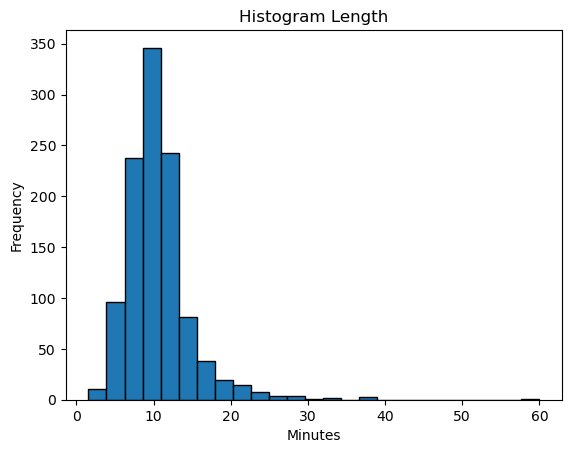

In [11]:
#Check lenght of Videos
plt.hist(df_videos_clean['duration_in_minutes'], bins=25, edgecolor='black')
plt.title('Histogram Length')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

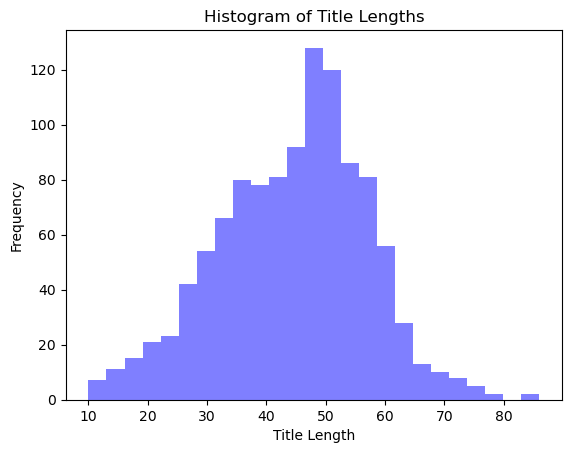

In [12]:
# Checking Title lengths
# Calculate the lengths of the strings in the 'title' column
title_lengths = df_videos_clean['title'].str.len()

# Create a histogram plot
plt.hist(title_lengths, bins=25, alpha=0.5, color='blue')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Histogram of Title Lengths')
plt.show()
#it graphs shows that it follow a normal distribution, that's interesting

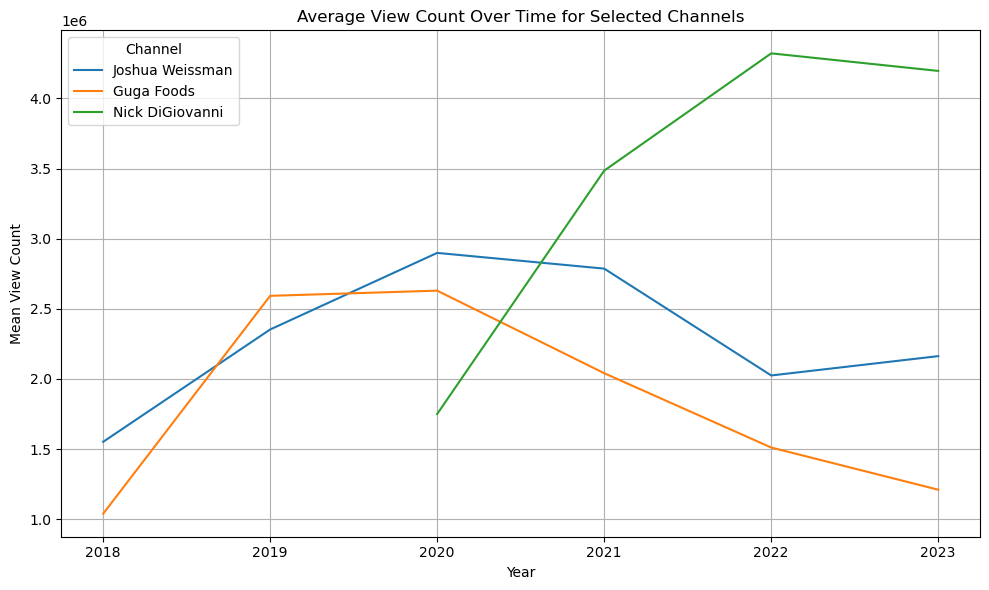

In [13]:
# Get unique channel names from df_videos_clean
channels_to_plot = df_videos_clean['channel_name'].unique()

mean_view_count_by_year_channel = df_videos_clean.groupby(["year", "channel_name"])["view_count"].mean().reset_index()

# Create a line plot for each channel
fig, ax = plt.subplots(figsize=(10, 6))
for channel in channels_to_plot:
    # Filter the data for the current channel
    channel_data = mean_view_count_by_year_channel[mean_view_count_by_year_channel['channel_name'] == channel]
    
    # Plot the data for the current channel
    ax.plot(channel_data['year'], channel_data['view_count'], label=channel)

# Customize the plot
plt.title('Average View Count Over Time for Selected Channels')
plt.xlabel('Year')
plt.ylabel('Mean View Count')
plt.legend(title="Channel")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# When they usually submit a video?
df_videos_clean.groupby(["day_published"]).size().reset_index(name='count')

,day_published,count
0,friday,80
1,monday,31
2,saturday,149
3,sunday,286
4,thursday,40
5,tuesday,51
6,wednesday,472


In [15]:
df_videos_clean.groupby(["day_published"])["view_count"].mean()
# We can confirm the previous table, it's interesting that both YouTubers submit videos the same days.

day_published
friday       2.034717e+06
monday       2.092069e+06
saturday     3.540872e+06
sunday       2.342057e+06
thursday     2.171498e+06
tuesday      1.831726e+06
wednesday    2.313635e+06
Name: view_count, dtype: float64

In [16]:
# Collaboration boost videos?
# How many videos have collaboration?
df_videos_clean.groupby(["collaboration"]).size()

collaboration
0    1082
1      27
dtype: int64

In [17]:
df_videos_clean.groupby(["collaboration"])["view_count"].mean()
#It's hard to tell based only in 25 videos, but it looks like that by collaborating you can gain some extra views

collaboration
0    2.430465e+06
1    2.503716e+06
Name: view_count, dtype: float64

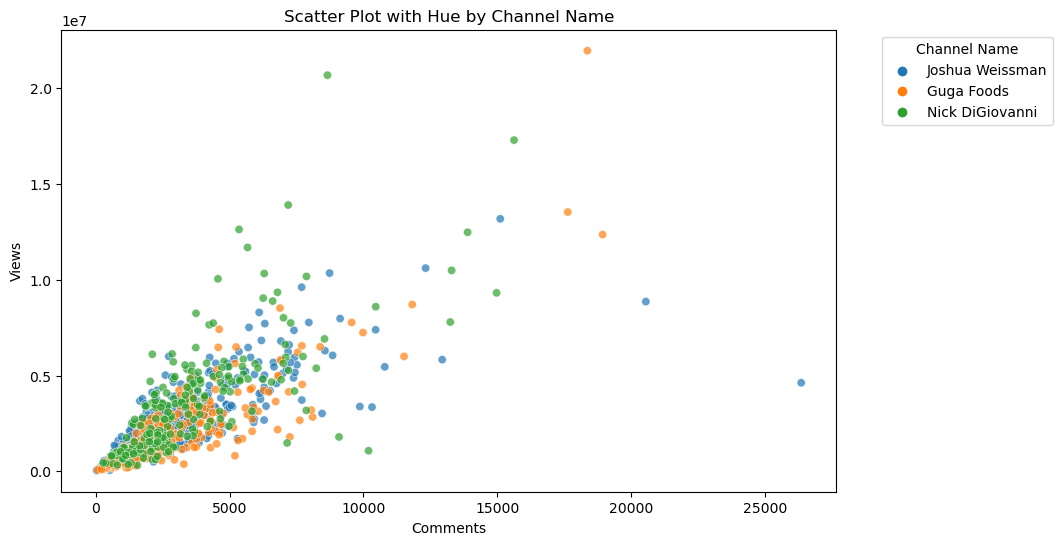

In [18]:
# More comments = more views?

# Extract the data from the DataFrame
x_data = df_videos_clean['comment_count']
y_data = df_videos_clean['view_count']
hue_data = df_videos_clean['channel_name']  # Channel name for hue

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_data, y=y_data, hue=hue_data, palette='tab10', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot with Hue by Channel Name')
plt.xlabel('Comments')
plt.ylabel('Views')

# Show the legend
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


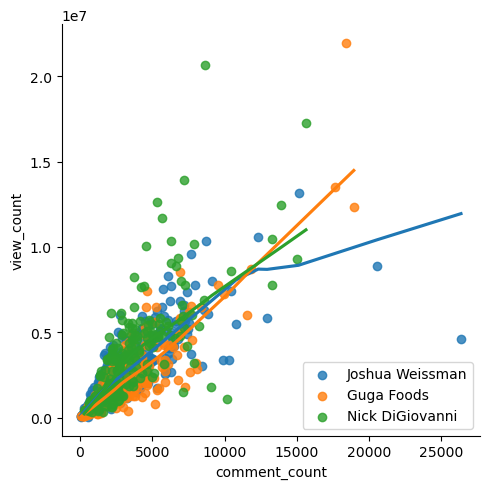

In [19]:
lm = sns.lmplot(x='comment_count', y='view_count', hue='channel_name', data=df_videos_clean,
                lowess=True, legend_out=False)

legend = lm._legend
legend.set_title("")

lm.set_titles("SOMETHING")

plt.show()

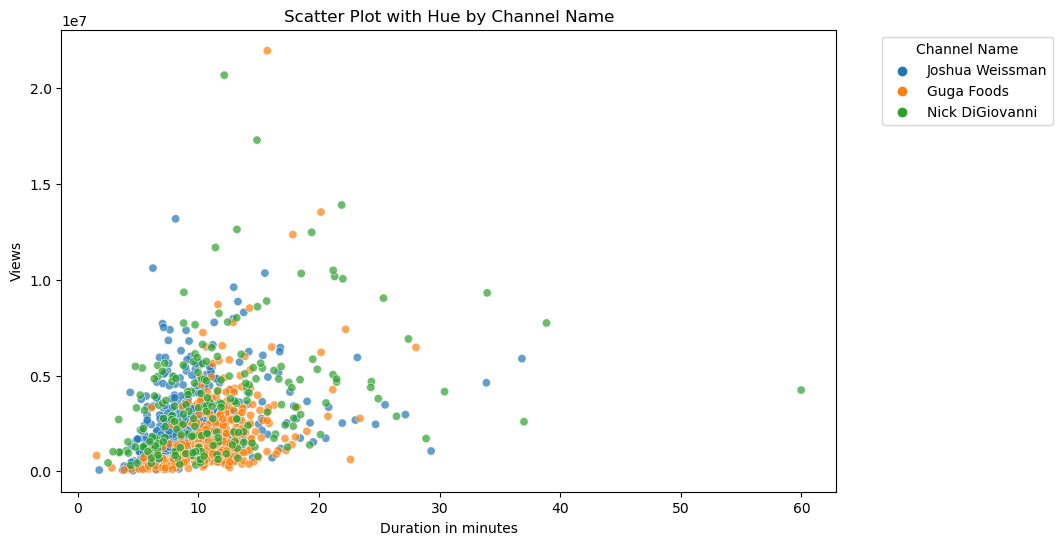

In [20]:
# larger videos = more views?

# Extract the data from the DataFrame
x_data = df_videos_clean['duration_in_minutes']
y_data = df_videos_clean['view_count']
hue_data = df_videos_clean['channel_name']  # Channel name for hue

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_data, y=y_data, hue=hue_data, palette='tab10', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot with Hue by Channel Name')
plt.xlabel('Duration in minutes')
plt.ylabel('Views')

# Show the legend
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


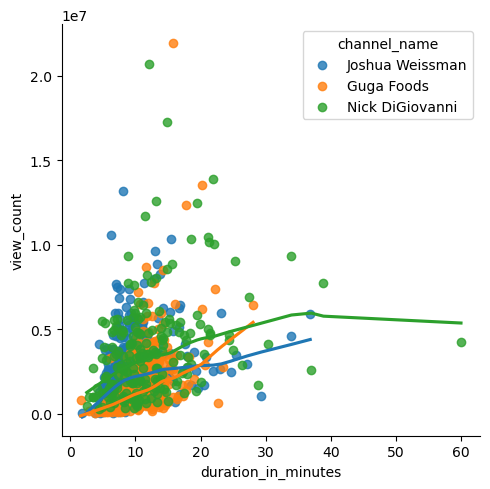

In [21]:
lm = sns.lmplot(x='duration_in_minutes', y='view_count', hue='channel_name', data=df_videos_clean,
                lowess=True, legend_out=False)
legend = lm._legend

plt.show()

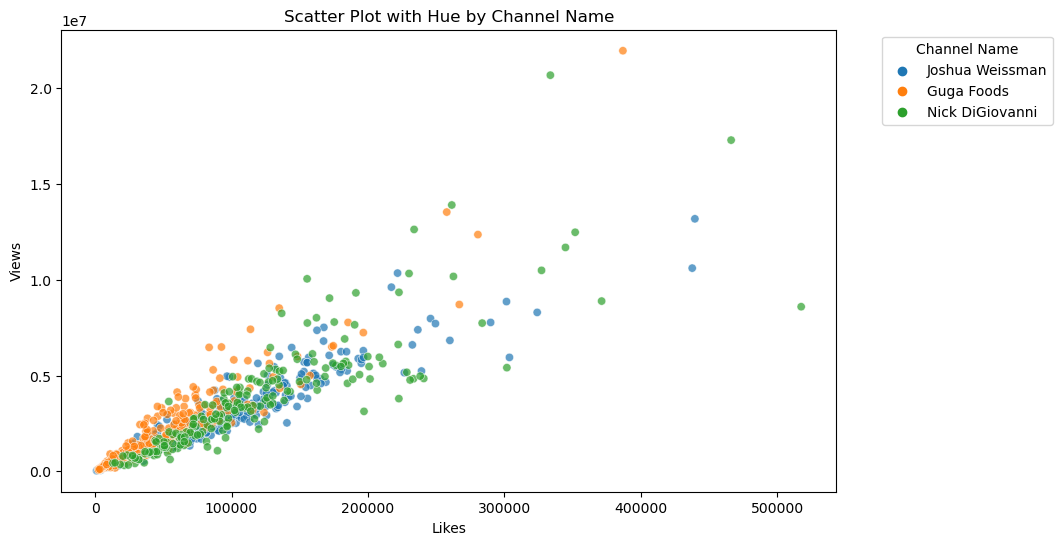

In [22]:
# more likes = more views?

# Extract the data from the DataFrame
x_data = df_videos_clean['like_count']
y_data = df_videos_clean['view_count']
hue_data = df_videos_clean['channel_name']  # Channel name for hue

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_data, y=y_data, hue=hue_data, palette='tab10', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot with Hue by Channel Name')
plt.xlabel('Likes')
plt.ylabel('Views')

# Show the legend
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


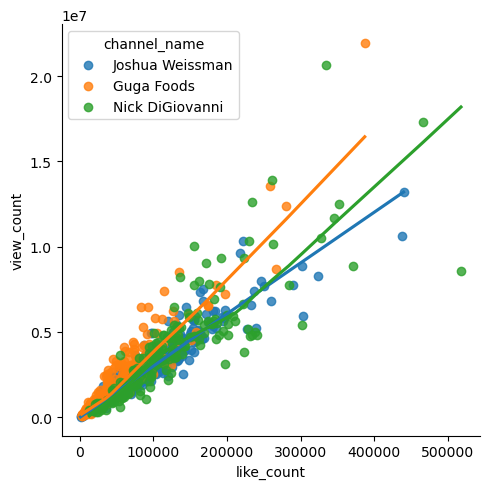

In [23]:
lm = sns.lmplot(x='like_count', y='view_count', hue='channel_name', data=df_videos_clean,
                lowess=True, legend_out=False)
legend = lm._legend

plt.show()

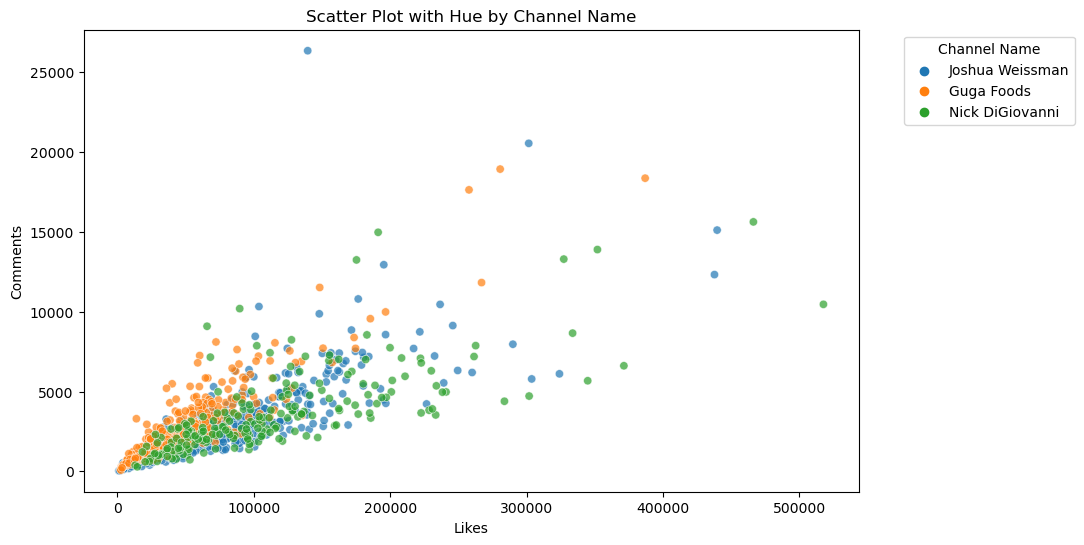

In [24]:
# more likes = more comments?

# Extract the data from the DataFrame
x_data = df_videos_clean['like_count']
y_data = df_videos_clean['comment_count']
hue_data = df_videos_clean['channel_name']  # Channel name for hue

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_data, y=y_data, hue=hue_data, palette='tab10', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot with Hue by Channel Name')
plt.xlabel('Likes')
plt.ylabel('Comments')

# Show the legend
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


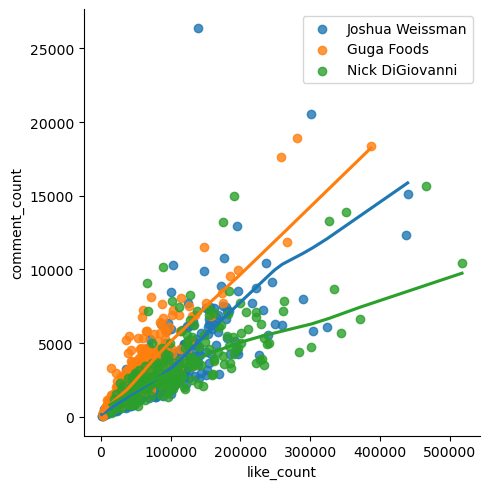

In [25]:
lm = sns.lmplot(x='like_count', y='comment_count', hue='channel_name', data=df_videos_clean,
                lowess=True, legend_out=False)

legend = lm._legend
legend.set_title("")

lm.set_titles("SOMETHING")

plt.show()

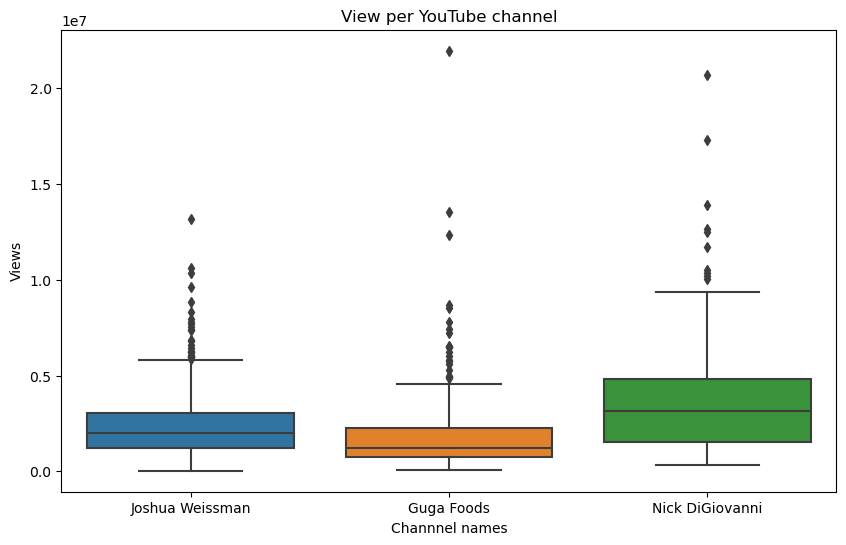

In [26]:
#boxplot View per Youtube Channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count', data=df_videos_clean)

# Setting details
plt.title('View per YouTube channel')
plt.xlabel('Channnel names')
plt.ylabel('Views')


plt.show()

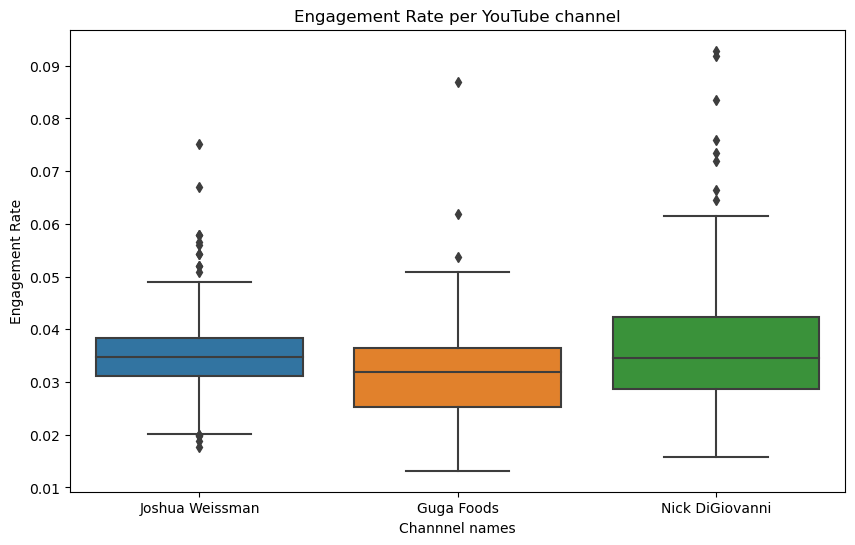

In [27]:
#Boxplot Engagement Rate per Youtube Channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='engagement', data=df_videos_clean)

# Setting details
plt.title('Engagement Rate per YouTube channel')
plt.xlabel('Channnel names')
plt.ylabel('Engagement Rate')


plt.show()

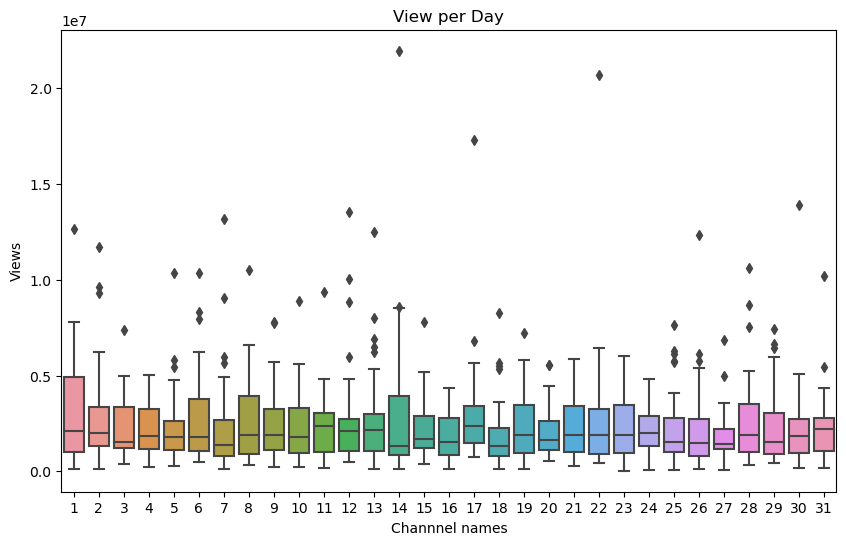

In [28]:
# Is there something else that we can learn from the data date and submission videos patterns?
# Boxplot View per Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='view_count', data=df_videos_clean)

# Setting details
plt.title('View per Day')
plt.xlabel('Channnel names')
plt.ylabel('Views')


plt.show()

In [29]:
df_year_cleaned['day'].value_counts().sort_values(ascending=False)
# It looks like that is better to have submit videos at the beginning of the month and then in the middle

13    68
2     67
7     65
12    62
17    61
23    61
19    60
8     60
22    60
14    60
27    60
5     59
16    59
11    59
1     58
15    58
10    57
4     57
6     56
9     56
26    56
21    56
20    55
28    55
3     53
18    52
24    51
30    50
25    50
29    46
31    32
Name: day, dtype: int64

/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/2206915873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videos_clean["published"] = pd.to_datetime(df_videos_clean["published"])


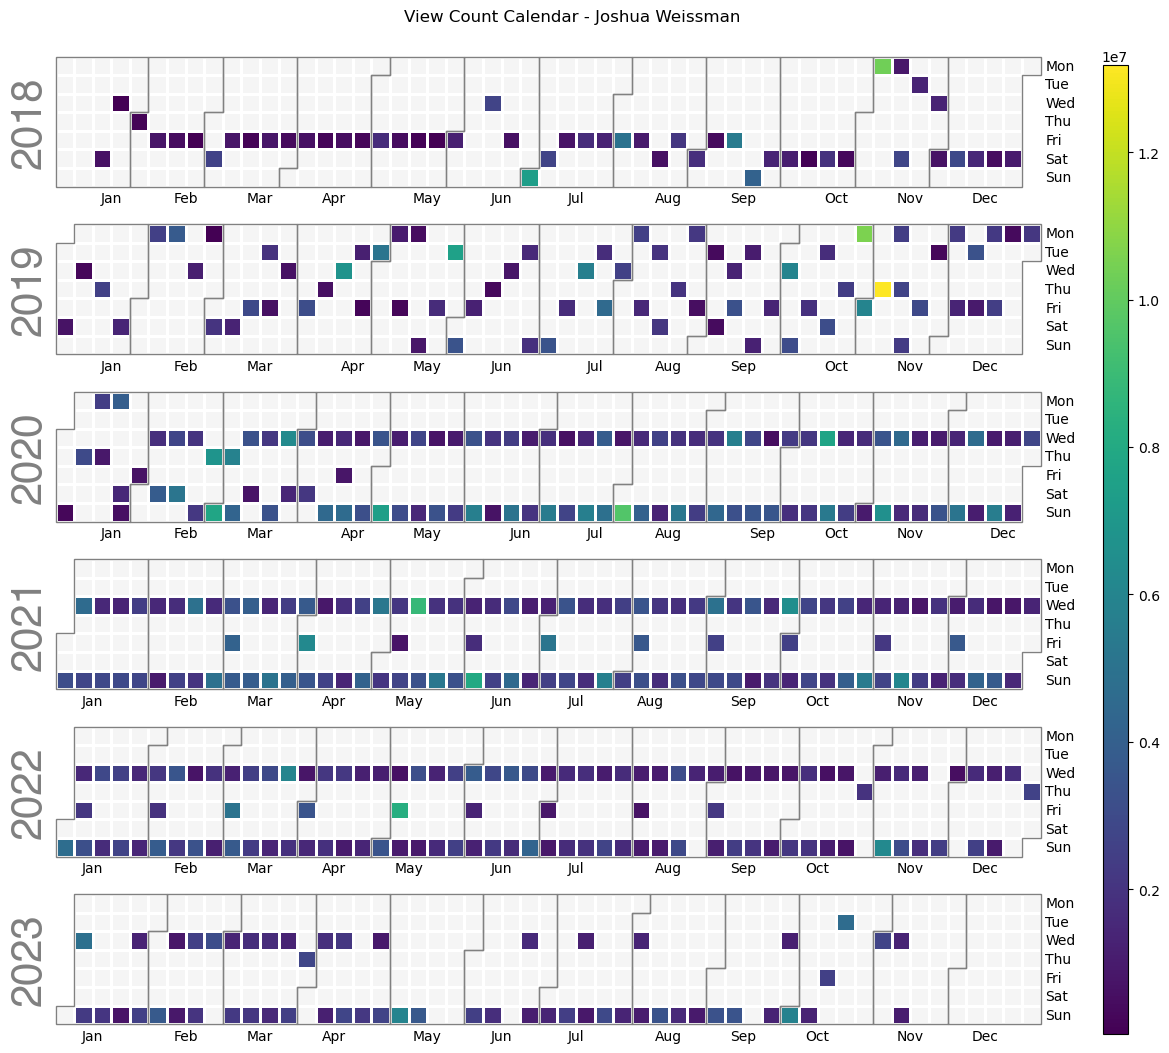

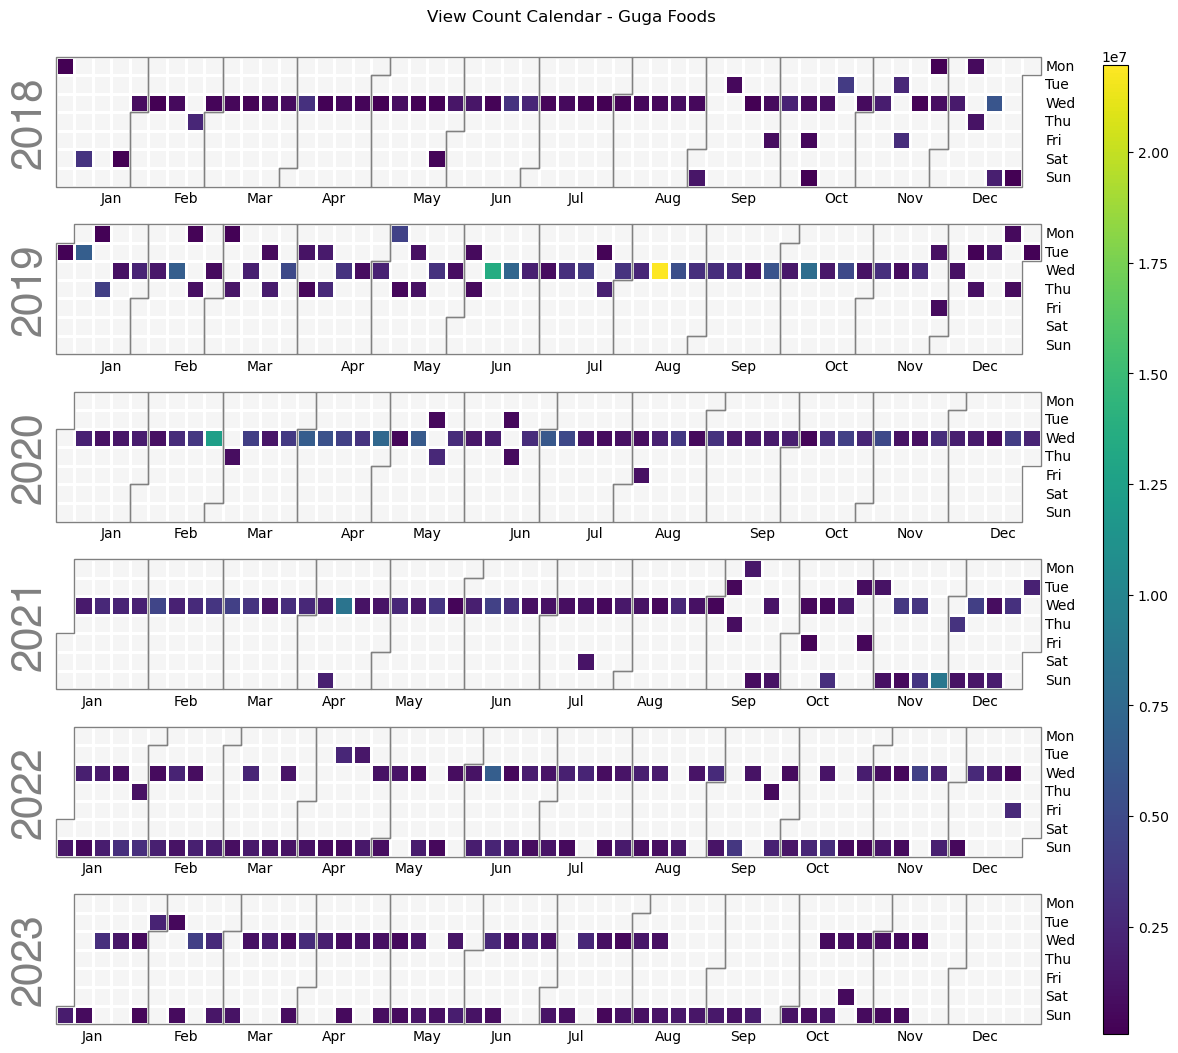

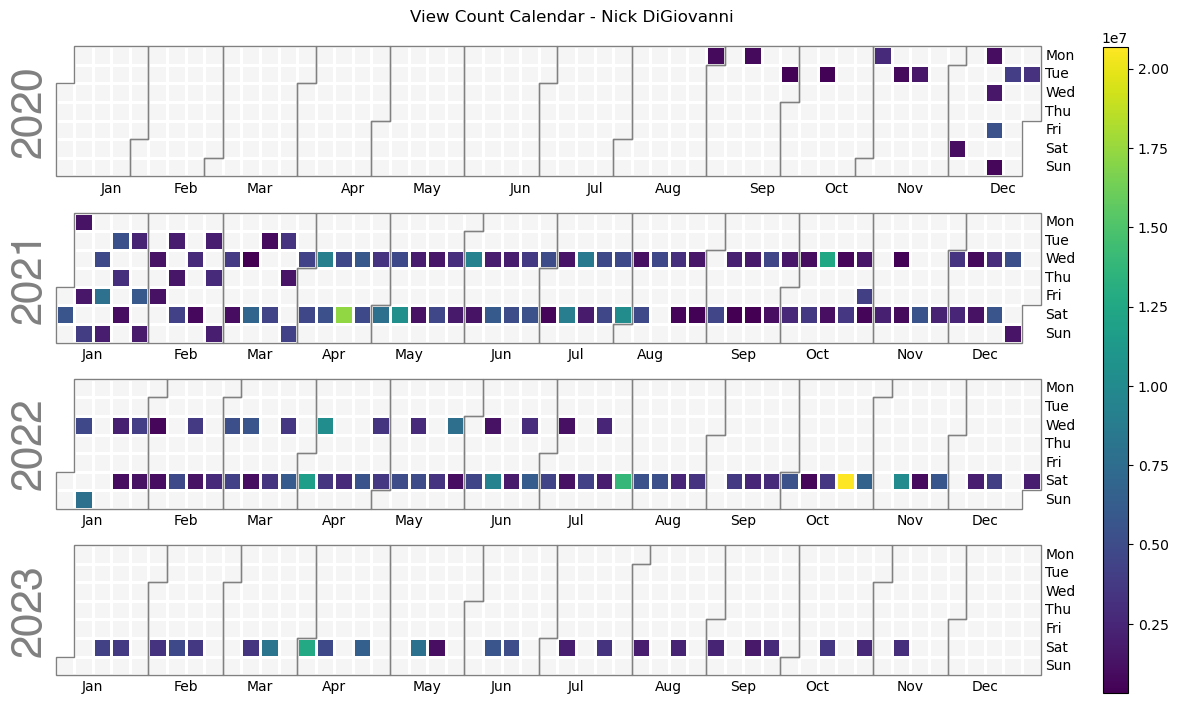

In [30]:

# Convert the "published" column to a datetime object
df_videos_clean["published"] = pd.to_datetime(df_videos_clean["published"])

# Get unique channel names
unique_channels = df_videos_clean["channel_name"].unique()

# Loop through unique channels and create separate calendar plots
for channel in unique_channels:
    # Create a subset DataFrame for the current channel
    channel_df = df_videos_clean[df_videos_clean["channel_name"] == channel]
    
    # Create a new DataFrame with "published" as the index and "view_count" as the values for the current channel
    channel_calendar = channel_df.set_index("published")["view_count"]
    
    # Create the calendar plot for the current channel
    calplot.calplot(channel_calendar, suptitle=f'View Count Calendar - {channel}')
    
    # Show the plot for the current channel
    plt.show()


In [31]:
# From the previous graph we can appreciate the strategy and consistency of videos uploading of each YouTube Channel

In [32]:
# Short videos analysis

/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/759044012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_clean["published"] = pd.to_datetime(df_short_clean["published"])


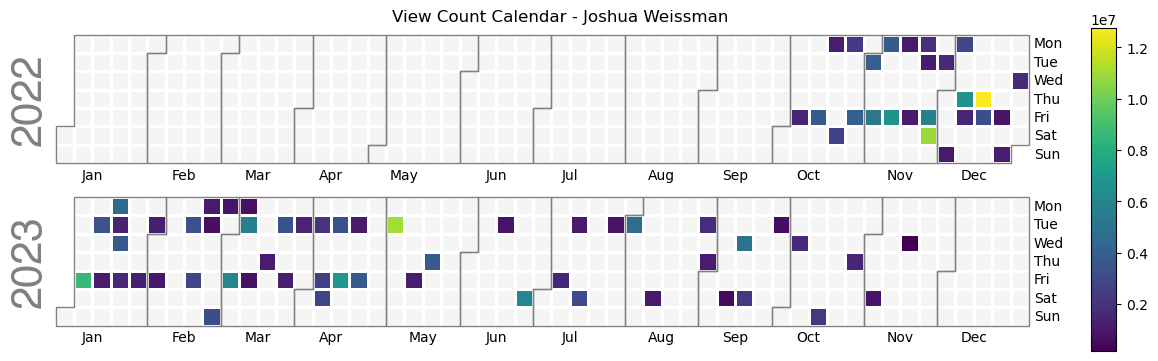

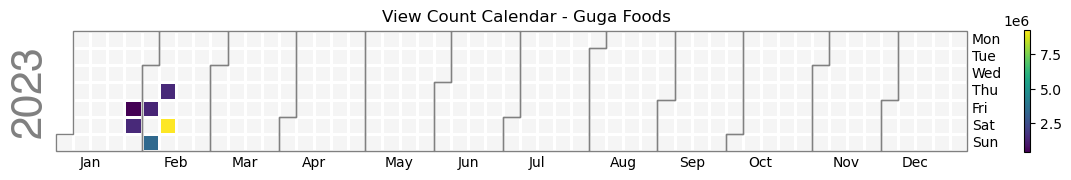

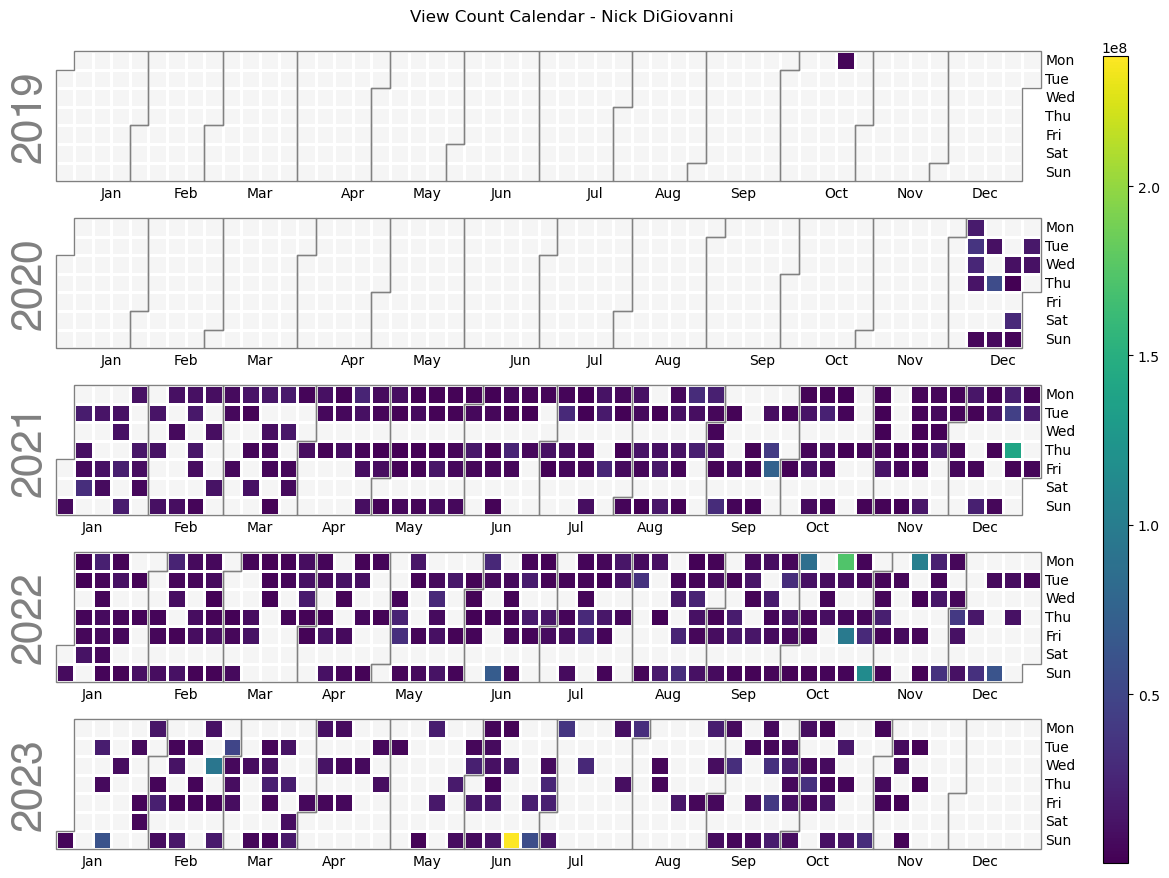

In [33]:
# Convert the "published" column to a datetime object
df_short_clean["published"] = pd.to_datetime(df_short_clean["published"])

# Get unique channel names
unique_channels = df_short_clean["channel_name"].unique()

# Loop through unique channels and create separate calendar plots
for channel in unique_channels:
    # Create a subset DataFrame for the current channel
    channel_df = df_short_clean[df_short_clean["channel_name"] == channel]
    
    # Create a new DataFrame with "published" as the index and "view_count" as the values for the current channel
    channel_calendar = channel_df.set_index("published")["view_count"]
    
    # Create the calendar plot for the current channel
    calplot.calplot(channel_calendar, suptitle=f'View Count Calendar - {channel}')
    
    # Show the plot for the current channel
    plt.show()


In [34]:
# From the previous chart we can notice that Nick DiGiovanni is bigger Youtuber but also very dedicated to shorts

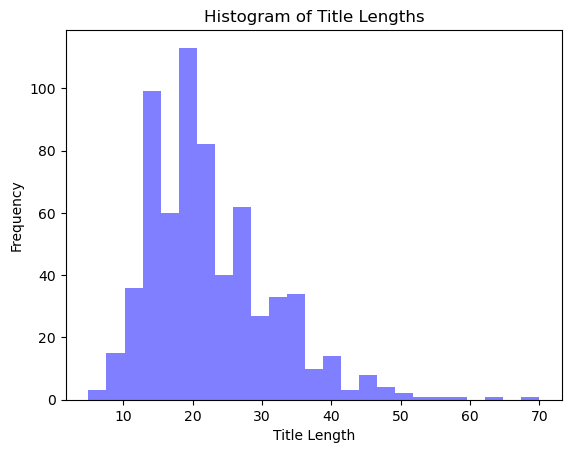

In [35]:
# Calculate the lengths of the strings in the 'title' column
title_lengths = df_short_clean['title'].str.len()

# Create a histogram plot
plt.hist(title_lengths, bins=25, alpha=0.5, color='blue')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Histogram of Title Lengths')
plt.show()
# It's interesting to see that Shorts in Youtube also means to have shorter title lengths

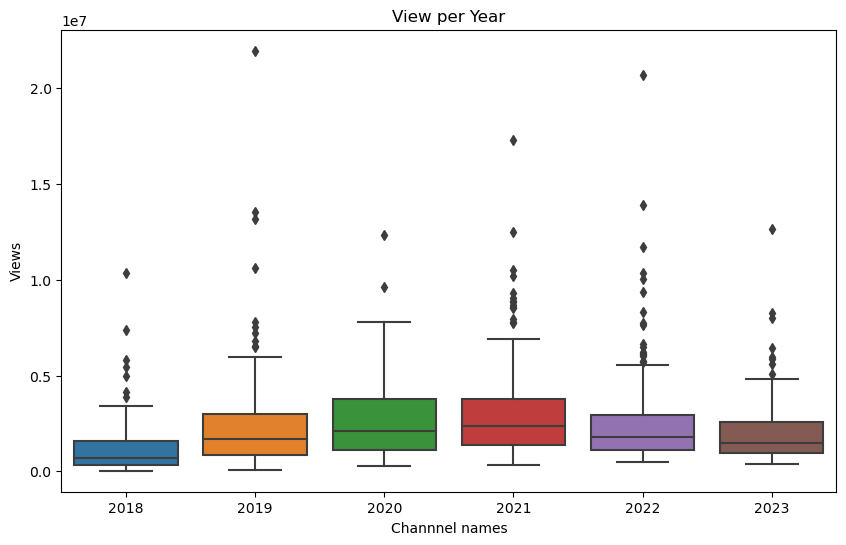

In [36]:
#View per Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='view_count', data=df_videos_clean)

# Setting details
plt.title('View per Year')
plt.xlabel('Channnel names')
plt.ylabel('Views')


plt.show()
# It looks like that the bumb of Covid is ending and less people are speding time in Youtube, 
# or also we need to wait until the year 2023 finishes
# or people are getting less excited about Food and Cooking

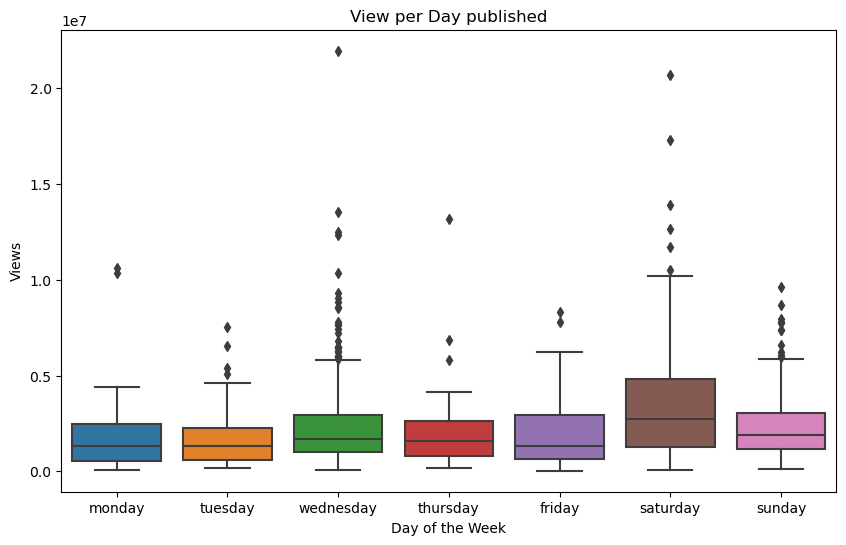

In [37]:
#Boxplot View per Day published
# Define the desired order for the days
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Create the boxplot with the specified order
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_published', y='view_count', data=df_videos_clean, order=day_order)

# Setting details
plt.title('View per Day published')
plt.xlabel('Day of the Week')
plt.ylabel('Views')

plt.show()

#I'm not surprised that videos that were uploaded during the weekend gets more views

/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/1869541037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videos_clean['day_type'] = df_videos_clean['day_published'].apply(lambda x: 'weekend' if x.lower() in ['sunday', 'friday', 'saturday'] else 'weekday')
/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/1869541037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_clean['day_type'] = df_short_clean['day_published'].apply(lambda x: 'weekend' if x.lower() in

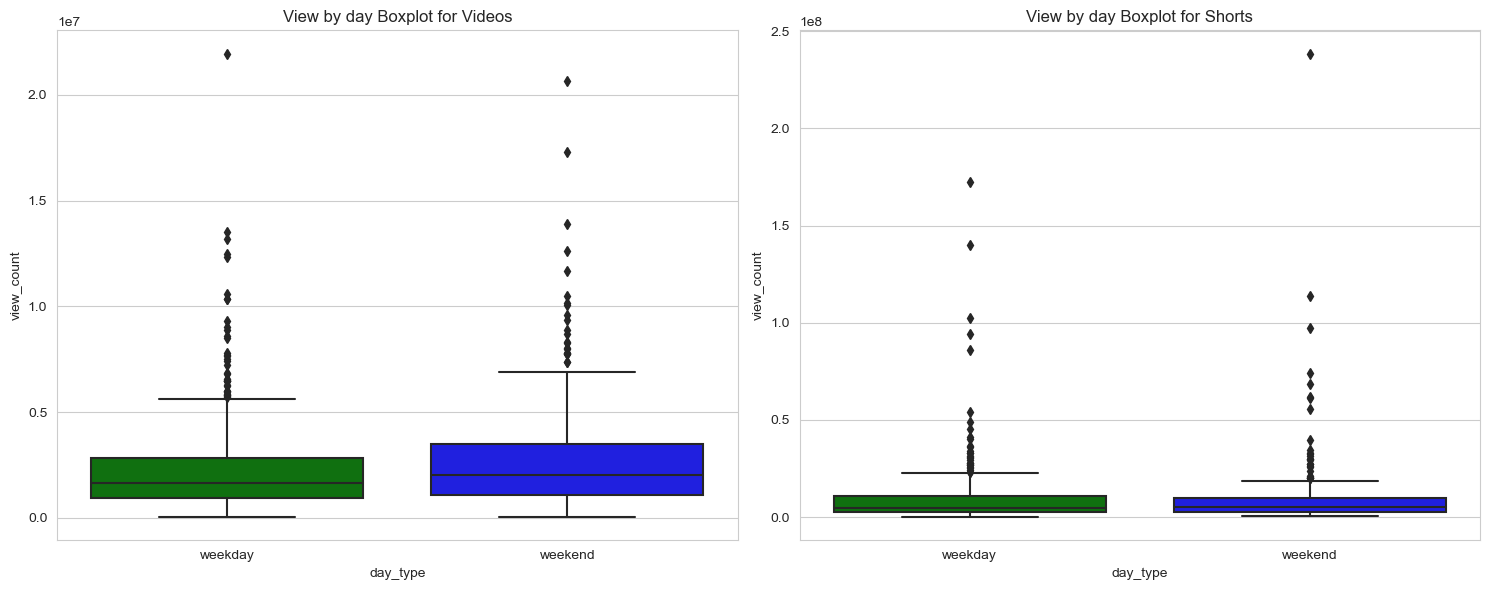

In [50]:
#Boxplot View Weekend and Weekday
# Define 'day_type' for both DataFrames
df_videos_clean['day_type'] = df_videos_clean['day_published'].apply(lambda x: 'weekend' if x.lower() in ['sunday', 'friday', 'saturday'] else 'weekday')
df_short_clean['day_type'] = df_short_clean['day_published'].apply(lambda x: 'weekend' if x.lower() in ['sunday', 'friday', 'saturday'] else 'weekday')

# Define the order of 'day_type' for consistent ordering
day_type_order = ['weekday', 'weekend']

# Create a color palette dictionary
color_palette = {'weekend': 'blue', 'weekday': 'green'}

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# Plot the first boxplot with consistent colors and order
plt.subplot(1, 2, 1)
sns.boxplot(x='day_type', y='view_count', data=df_videos_clean, palette=color_palette, order=day_type_order)
plt.title('View by day Boxplot for Videos')

# Plot the second boxplot with consistent colors and order
plt.subplot(1, 2, 2)
sns.boxplot(x='day_type', y='view_count', data=df_short_clean, palette=color_palette, order=day_type_order)
plt.title('View by day Boxplot for Shorts')

# Show the plots
plt.tight_layout()
plt.show()

In [39]:
# Short or nomal YouTube videos, which one has more views?

[Text(0.5, 0, 'view_count'),
 Text(1.5, 0, 'comment_count'),
 Text(2.5, 0, 'like_count'),
 Text(3.5, 0, 'duration_in_minutes'),
 Text(4.5, 0, 'short'),
 Text(5.5, 0, 'collaboration')]

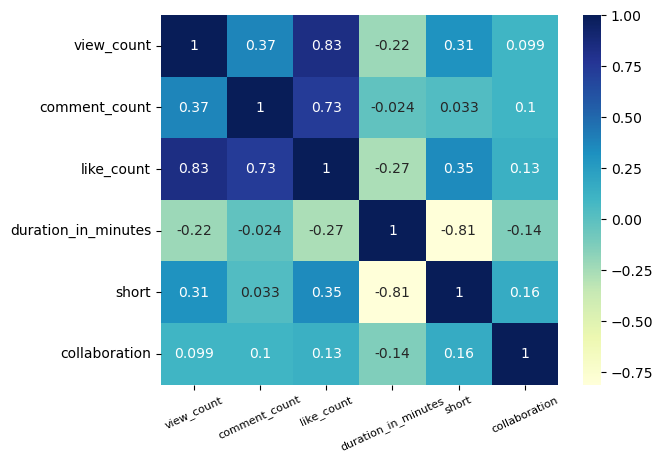

In [40]:
correlation_matrix = df_year_cleaned[['view_count', 'comment_count', 'like_count', 'duration_in_minutes','short', 'collaboration']].corr()

plot = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='center', fontsize=8)

In [41]:
# MOST INTERESTING GRAPHS

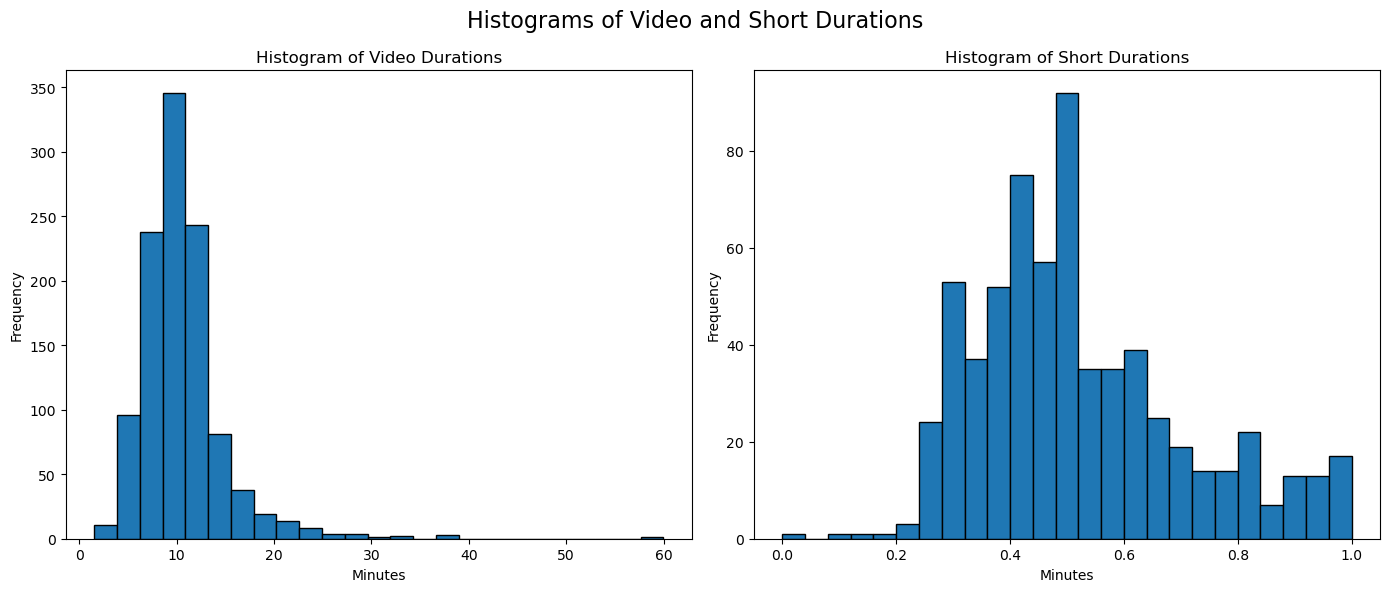

In [42]:
#Video duration videos between YouTube videos and Shorts

# Set the number of bins and edgecolor for the histograms
bins = 25
edgecolor = 'black'

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for df_videos_clean in the first subplot
axes[0].hist(df_videos_clean['duration_in_minutes'], bins=bins, edgecolor=edgecolor)
axes[0].set_title('Histogram of Video Durations')
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Frequency')

# Plot the histogram for df_short_clean in the second subplot
axes[1].hist(df_short_clean['duration_in_minutes'], bins=bins, edgecolor=edgecolor)
axes[1].set_title('Histogram of Short Durations')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Frequency')

# Customize the overall figure title
fig.suptitle('Histograms of Video and Short Durations', fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the figure with both subplots
plt.show()

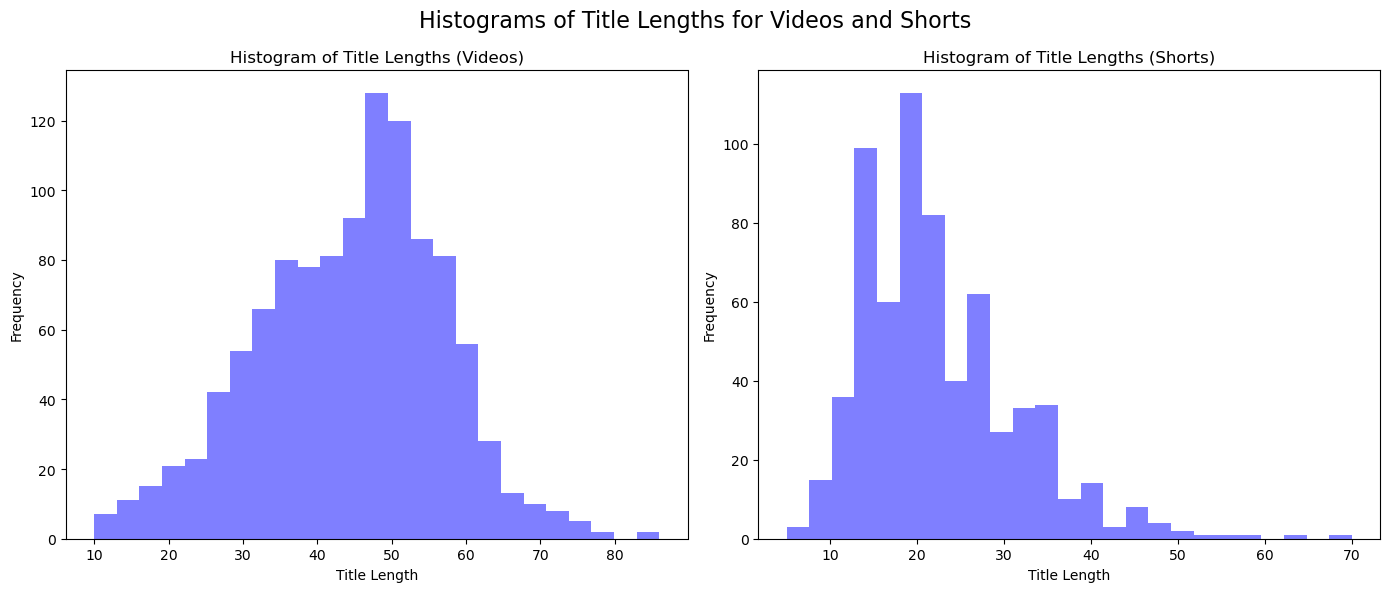

In [43]:
#Video Title Length between YouTube videos and Shorts

# Set the number of bins for the histograms
bins = 25

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for title lengths in df_videos_clean in the first subplot
title_lengths_videos = df_videos_clean['title'].str.len()
axes[0].hist(title_lengths_videos, bins=bins, alpha=0.5, color='blue')
axes[0].set_title('Histogram of Title Lengths (Videos)')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Frequency')

# Plot the histogram for title lengths in df_short_clean in the second subplot
title_lengths_shorts = df_short_clean['title'].str.len()
axes[1].hist(title_lengths_shorts, bins=bins, alpha=0.5, color='blue')
axes[1].set_title('Histogram of Title Lengths (Shorts)')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Frequency')

# Customize the overall figure title
fig.suptitle('Histograms of Title Lengths for Videos and Shorts', fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the figure with both subplots
plt.show()


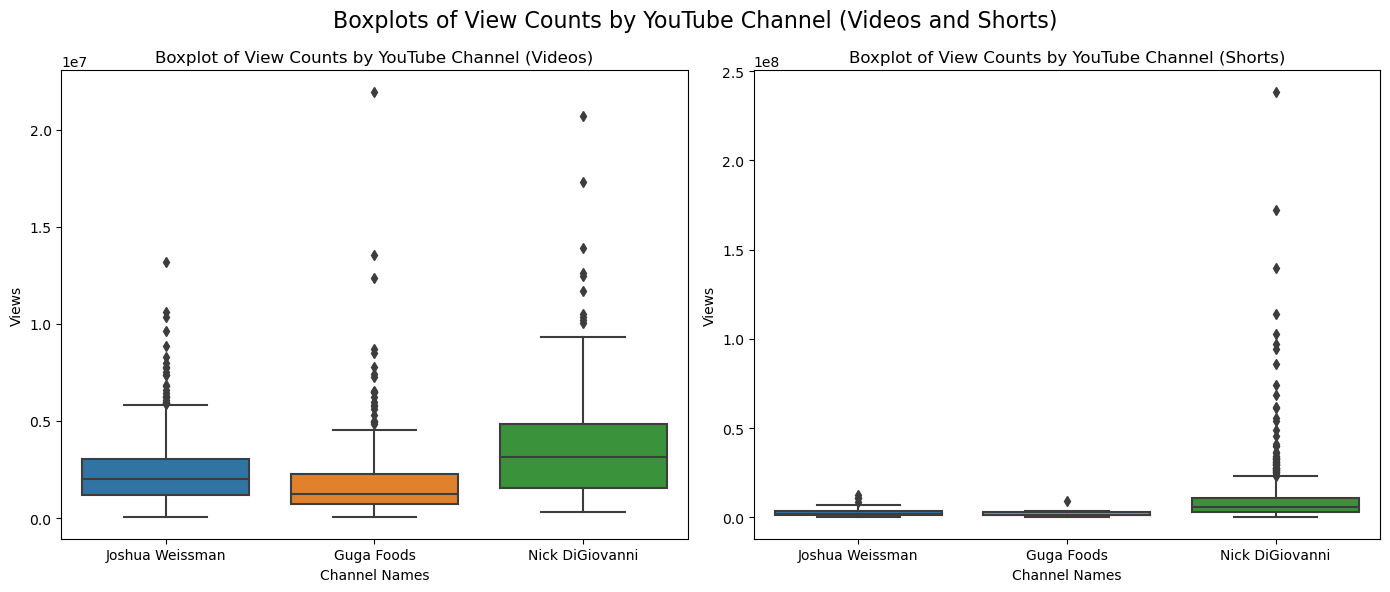

In [44]:
#Avg Views between YouTube videos and Shorts

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the boxplot for df_videos_clean in the first subplot
sns.boxplot(x='channel_name', y='view_count', data=df_videos_clean, ax=axes[0])
axes[0].set_title('Boxplot of View Counts by YouTube Channel (Videos)')
axes[0].set_xlabel('Channel Names')
axes[0].set_ylabel('Views')

# Plot the boxplot for df_short_clean in the second subplot
sns.boxplot(x='channel_name', y='view_count', data=df_short_clean, ax=axes[1])
axes[1].set_title('Boxplot of View Counts by YouTube Channel (Shorts)')
axes[1].set_xlabel('Channel Names')
axes[1].set_ylabel('Views')

# Customize the overall figure title
fig.suptitle('Boxplots of View Counts by YouTube Channel (Videos and Shorts)', fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Rotate the x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='x', rotation=0)

# Show the figure with both subplots
plt.show()

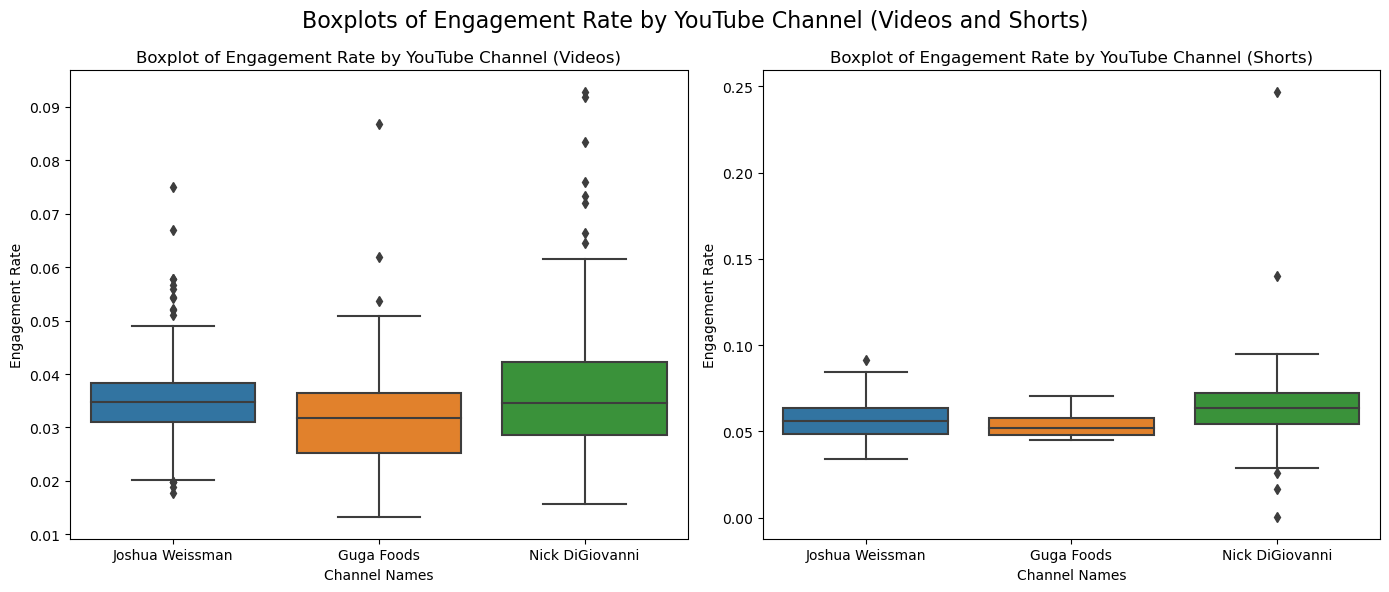

In [45]:
#Engagement between YouTube videos and Shorts

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the boxplot for df_videos_clean in the first subplot
sns.boxplot(x='channel_name', y='engagement', data=df_videos_clean, ax=axes[0])
axes[0].set_title('Boxplot of Engagement Rate by YouTube Channel (Videos)')
axes[0].set_xlabel('Channel Names')
axes[0].set_ylabel('Engagement Rate')

# Plot the boxplot for df_short_clean in the second subplot
sns.boxplot(x='channel_name', y='engagement', data=df_short_clean, ax=axes[1])
axes[1].set_title('Boxplot of Engagement Rate by YouTube Channel (Shorts)')
axes[1].set_xlabel('Channel Names')
axes[1].set_ylabel('Engagement Rate')

# Customize the overall figure title
fig.suptitle('Boxplots of Engagement Rate by YouTube Channel (Videos and Shorts)', fontsize=16)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Rotate the x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='x', rotation=0)

# Show the figure with both subplots
plt.show()

/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/jeffrytroll/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/3705715108.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


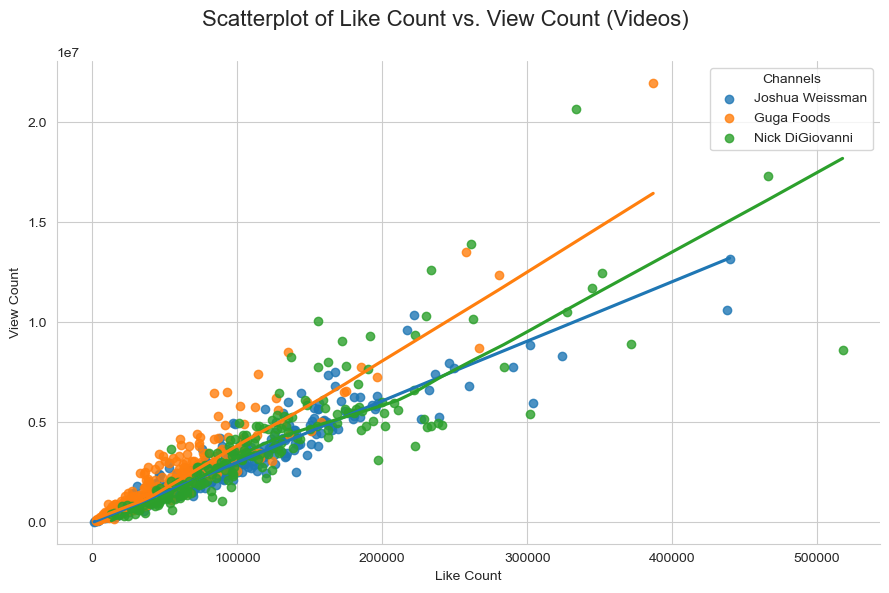

In [46]:
# Scatterplot of Likes and Views of YouTube videos

# Set the style
sns.set_style("whitegrid")

# Create an lmplot for df_videos_clean
lm_videos = sns.lmplot(x='like_count', y='view_count', hue='channel_name', data=df_videos_clean,
                       lowess=True, legend_out=False, height=6, aspect=1.5)

# Customize the legend title and labels
legend = lm_videos._legend
legend.set_title("Channels")
lm_videos.set_titles("Scatterplot of Like Count vs. View Count (Videos)")

# Set the axis labels and title
lm_videos.set_xlabels("Like Count")
lm_videos.set_ylabels("View Count")
lm_videos.fig.suptitle('Scatterplot of Like Count vs. View Count (Videos)', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the lmplot
plt.show()

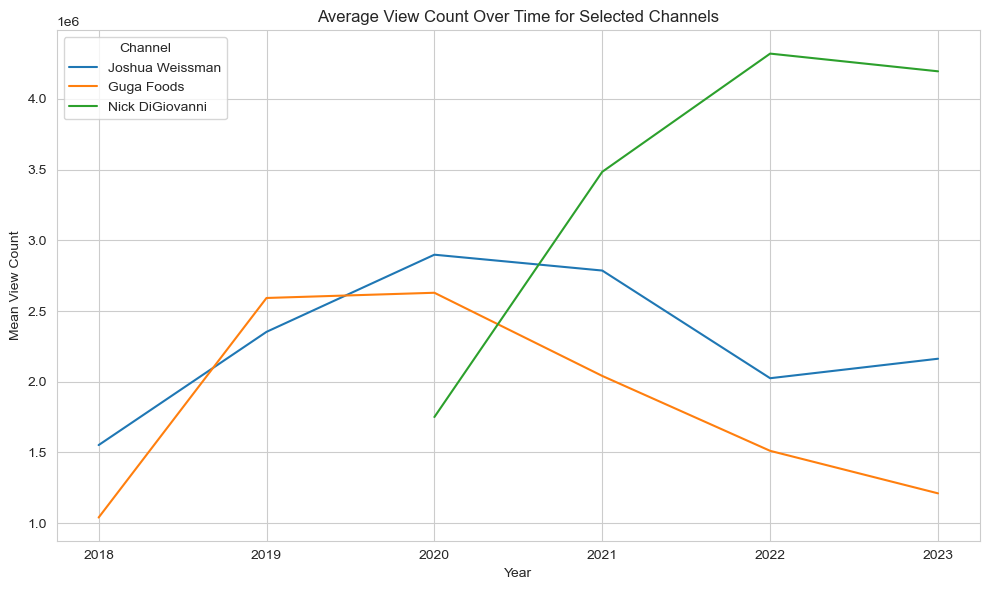

In [47]:
# Get unique channel names from df_videos_clean
channels_to_plot = df_videos_clean['channel_name'].unique()

mean_view_count_by_year_channel = df_videos_clean.groupby(["year", "channel_name"])["view_count"].mean().reset_index()

# Create a line plot for each channel
fig, ax = plt.subplots(figsize=(10, 6))
for channel in channels_to_plot:
    # Filter the data for the current channel
    channel_data = mean_view_count_by_year_channel[mean_view_count_by_year_channel['channel_name'] == channel]
    
    # Plot the data for the current channel
    ax.plot(channel_data['year'], channel_data['view_count'], label=channel)

# Customize the plot
plt.title('Average View Count Over Time for Selected Channels')
plt.xlabel('Year')
plt.ylabel('Mean View Count')
plt.legend(title="Channel")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_13883/1974814152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videos_clean["published"] = pd.to_datetime(df_videos_clean["published"])


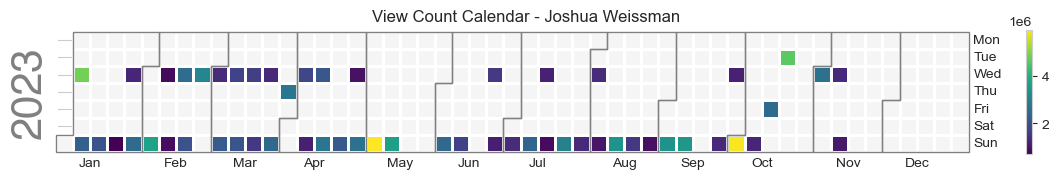

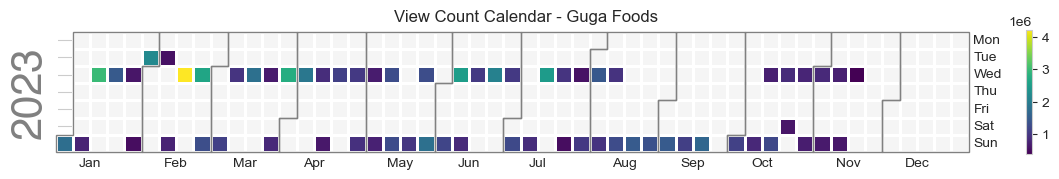

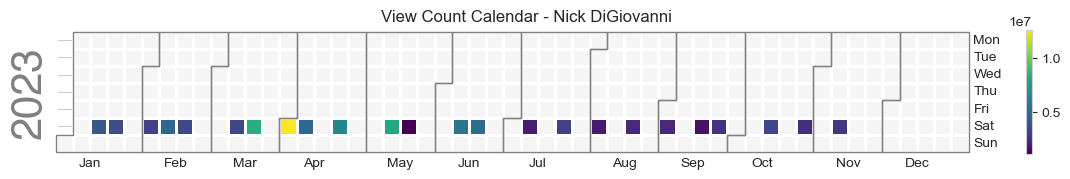

In [54]:

# Convert the "published" column to a datetime object
df_videos_clean["published"] = pd.to_datetime(df_videos_clean["published"])
df_2023 = df_videos_clean[df_videos_clean["published"].dt.year == 2023]

# Get unique channel names
unique_channels = df_2023["channel_name"].unique()

# Loop through unique channels and create separate calendar plots
for channel in unique_channels:
    # Create a subset DataFrame for the current channel
    channel_df = df_2023[df_2023["channel_name"] == channel]
    
    # Create a new DataFrame with "published" as the index and "view_count" as the values for the current channel
    channel_calendar = channel_df.set_index("published")["view_count"]
    
    # Create the calendar plot for the current channel
    calplot.calplot(channel_calendar, suptitle=f'View Count Calendar - {channel}')
    
    # Show the plot for the current channel
    plt.show()


[Text(0.5, 0, 'view_count'),
 Text(1.5, 0, 'comment_count'),
 Text(2.5, 0, 'like_count'),
 Text(3.5, 0, 'duration_in_minutes'),
 Text(4.5, 0, 'short'),
 Text(5.5, 0, 'collaboration')]

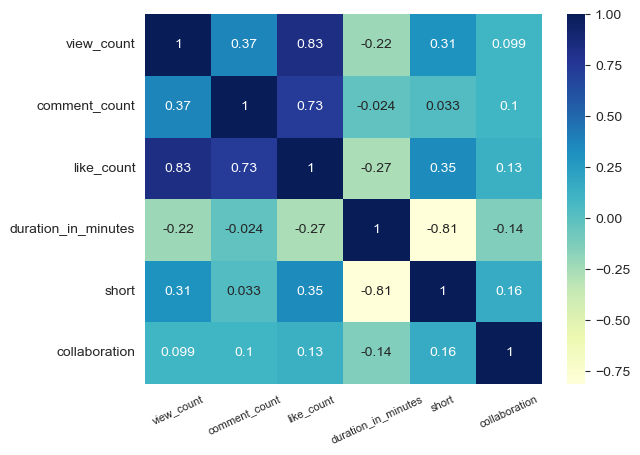

In [49]:
correlation_matrix = df_year_cleaned[['view_count', 'comment_count', 'like_count', 'duration_in_minutes','short', 'collaboration']].corr()

plot = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='center', fontsize=8)